# Unemploymwent Regression Model
##  Multiple linear regression

This project runs a Regression analysis among the variables, change in FED funds assets, Apple Close, and the Vanguard Tech ETF. The target variable was the Bureau of Labor Statistics Unemplyoment rate.  I took monthly observations of all the variables and ran a regression.  Since Apple is now a $2 Trillion company and many news outlets are stating wall street is out of touch with main street, I wanted to see if there was a reslationship between Tech ETFs, Apple closing price and the change in the federal funds rate. 

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4

In [4]:
import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter

#### (Multiple) linear regression on the enrollment data

In [18]:
address = 'C:/Users/Owner/Documents/Udacity_Blog/Regression_1.csv'

AAPL_Regression = pd.read_csv(address)
AAPL_Regression.columns = ['Close', 'Unemployment Numbers', 'FRED_ASSETS_%_CHANGE', 'TECH_ETF_Close']
AAPL_Regression.head()

,Close,Unemployment Numbers,FRED_ASSETS_%_CHANGE,TECH_ETF_Close
0,55.599998,9.8,-0.7,55.599998
1,59.160000,9.8,-0.7,59.160000
2,58.599998,9.9,0.1,58.599998
3,61.520000,9.9,0.6,61.520000
4,63.939999,9.6,3.2,63.939999


I like looking for visual multicollinearity.  Most of the variables have a strong relationship between them.  This is usually 
not good.  Also, I scaled the Federal reserve's asset to change.  

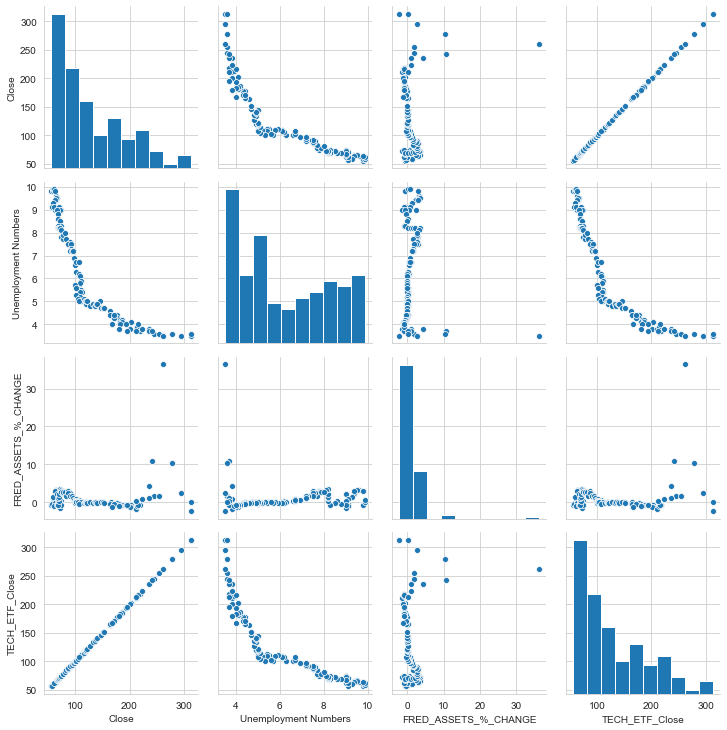

In [19]:
sb.pairplot(AAPL_Regression)

In [20]:
print(AAPL_Regression.corr())

                         Close  Unemployment Numbers  FRED_ASSETS_%_CHANGE  \
Close                 1.000000             -0.867841              0.153546   
Unemployment Numbers -0.867841              1.000000             -0.005754   
FRED_ASSETS_%_CHANGE  0.153546             -0.005754              1.000000   
TECH_ETF_Close        1.000000             -0.867841              0.153546   

                      TECH_ETF_Close  
Close                       1.000000  
Unemployment Numbers       -0.867841  
FRED_ASSETS_%_CHANGE        0.153546  
TECH_ETF_Close              1.000000  


In [32]:
Reg_data = AAPL_Regression[[ 'FRED_ASSETS_%_CHANGE', 'TECH_ETF_Close','Close']].values

AAPL_target = AAPL_Regression[['Unemployment Numbers']].values

enroll_data_names = ['unem', 'FRED_ASSETS_%_CHANGE', 'TECH_ETF_Close']

X, y = scale(Reg_data), AAPL_target

### Checking for missing values

In [33]:

missing_values = X==np.NAN
X[missing_values == True]

array([], dtype=float64)

We found that there is a strong relationship between the unemployment rate and the tech sector.  The R^2 is high so that means 
the model shows 76% of the variation in the unemployment rate.  T

In [34]:
LinReg = LinearRegression(normalize=True)

LinReg.fit(X, y)

print(LinReg.score(X, y))

0.7697960326967359
